In [1]:
import resiliencyTool as rt
import warnings
import numpy as np
import matplotlib.pyplot as plt

warnings.simplefilter("ignore") # warning are ignored for now

d:\documents\github\resiliencytool\resiliencyTool\network.py:570: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  *[(key, value) for key, value in metric.__dict__.items() if key is not 'value'])


In [2]:
simulationName = 'basic_example';
network = rt.network.Network(simulationName);
simulation = rt.simulation.Sim(simulationName);
network.nodes['bus1']

start= 1, stop= 41
start= 12, stop= 17


In [3]:
fcs = rt.fragilitycurve.readFragilityCurves(simulationName)

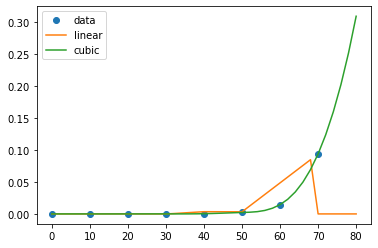

In [4]:
xnew = np.linspace(0, 80, num=41, endpoint=True)
xdata = fcs[0][1]
ydata = fcs[0][2]
ynew = rt.fragilitycurve.interpolate_fc(xdata,ydata, xnew, k=1)
ynew2 = rt.fragilitycurve.interpolate_fc(xdata,ydata, xnew, k=3)

plt.plot(xdata, ydata, 'o', xnew, ynew, '-',xnew, ynew2, '-')
plt.legend(['data', 'linear', 'cubic'], loc='best')
plt.show()

(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:xlabel='intensity', ylabel='probability of failure'>)

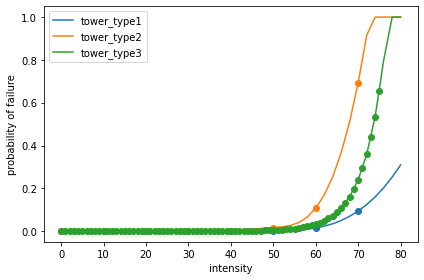

In [5]:
df = rt.fragilitycurve.populateFragilityCurveDatabase(fcs, xnew)

rt.fragilitycurve.plotFragilityCurves(df,fcs)

(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:title={'center':'tower_type2'}, xlabel='intensity', ylabel='probability of failure'>)

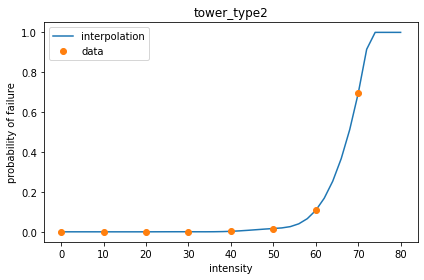

In [6]:
fc = rt.fragilitycurve.FragilityCurve(fcs[1][0], list(fcs[1][1]), list(fcs[1][2]))
fc.plot_fc(xnew, k=3)

In [7]:
fc.interpolate(65)

0.30673025751619915

In [15]:
network.nodes['bus1'].fragility_curve

'tower_type1'